In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualizaiton
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Regressor
from sklearn.linear_model import LogisticRegressionCV

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

## Load and clean data

In [2]:
df1 = pd.read_csv("accepted_2007_to_2018Q4.csv")

/Users/zhihanzhou/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df1.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [5]:
# set id as index
df1.set_index('id', inplace = True)

In [6]:
# how many rows and columns of data
print('The original dataset has',len(df1),'rows, and',len(df1.columns),'columns.')

The original dataset has 2260701 rows, and 150 columns.


In [7]:
# grab the features which we think might impact the dependent variable 'loan_status' according to the description 

df=df1[['loan_amnt','term','grade','annual_inc','verification_status','dti','delinq_2yrs','fico_range_high','inq_last_6mths','open_acc','pub_rec','revol_bal',\
        'revol_util','total_acc','avg_cur_bal','total_rev_hi_lim','acc_open_past_24mths','pct_tl_nvr_dlq','loan_status']]

In [8]:
# pd.set_option('display.max_rows', None)

# drop all rows with nan 
df.dropna(inplace = True)
df.head()

/Users/zhihanzhou/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,loan_amnt,term,grade,annual_inc,verification_status,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,avg_cur_bal,total_rev_hi_lim,acc_open_past_24mths,pct_tl_nvr_dlq,loan_status
id,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36 months,C,55000.0,Not Verified,5.91,0.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,20701.0,9300.0,4.0,76.9,Fully Paid
68355089,24700.0,36 months,C,65000.0,Not Verified,16.06,1.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,9733.0,111800.0,4.0,97.4,Fully Paid
68341763,20000.0,60 months,B,63000.0,Not Verified,10.78,0.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,31617.0,14000.0,6.0,100.0,Fully Paid
66310712,35000.0,60 months,C,110000.0,Source Verified,17.06,0.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,23192.0,67300.0,2.0,100.0,Current
68476807,10400.0,60 months,F,104433.0,Source Verified,25.37,1.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,27644.0,34000.0,10.0,96.6,Fully Paid


In [9]:
# we only consider whether the account is fully paid ontime, and meet the credit policy
df['loan_status'].value_counts()

Fully Paid            1018486
Current                876153
Charged Off            257993
Late (31-120 days)      21416
In Grace Period          8419
Late (16-30 days)        4341
Default                    40
Name: loan_status, dtype: int64

In [10]:
# change predicting variables into 1 and 0
df = df[df['loan_status'].isin(['Fully Paid','Charged Off', 'Default','Late (31-120 days)','Late (16-30 days)'])]
df['loan_status'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0, 'Late (31-120 days)':0, 'Late (16-30 days)':0, 'Default':0})

In [11]:
# new dataset size
print('New dataset has',len(df),'rows, and',len(df.columns),'columns.')

New dataset has 1302276 rows, and 19 columns.


In [14]:
# the description of our 30 features
datadic = pd.read_excel("LCDataDictionary.xlsx",index_col = 0)
columns = df.columns.to_list()
datadic.loc[columns]

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
grade,LC assigned loan grade
annual_inc,The self-reported annual income provided by th...
verification_status,"Indicates if income was verified by LC, not ve..."
dti,A ratio calculated using the borrower’s total ...
delinq_2yrs,The number of 30+ days past-due incidences of ...
fico_range_high,The upper boundary range the borrower’s FICO a...
inq_last_6mths,The number of inquiries in past 6 months (excl...


In [15]:
df.describe()

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,avg_cur_bal,total_rev_hi_lim,acc_open_past_24mths,pct_tl_nvr_dlq,loan_status
count,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06,1.302276e+06
mean,1.459452e+04,7.666833e+04,1.852341e+01,3.273715e-01,6.993370e+02,6.449954e-01,1.169547e+01,2.246267e-01,1.635639e+04,5.174997e+01,2.507970e+01,1.343603e+04,3.277237e+04,4.713187e+00,9.414659e+01,7.820815e-01
std,8.770777e+03,7.084206e+04,1.147000e+01,8.937179e-01,3.143066e+01,9.300622e-01,5.512403e+00,6.165761e-01,2.258379e+04,2.437739e+01,1.203151e+01,1.614274e+04,3.651831e+04,3.198382e+00,8.767690e+00,4.128319e-01
min,1.000000e+03,1.600000e+01,-1.000000e+00,0.000000e+00,6.640000e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,4.600000e+04,1.197000e+01,0.000000e+00,6.740000e+02,0.000000e+00,8.000000e+00,0.000000e+00,5.996000e+03,3.350000e+01,1.600000e+01,3.093000e+03,1.400000e+04,2.000000e+00,9.130000e+01,1.000000e+00
50%,1.200000e+04,6.500000e+04,1.783000e+01,0.000000e+00,6.940000e+02,0.000000e+00,1.100000e+01,0.000000e+00,1.118400e+04,5.200000e+01,2.300000e+01,7.369000e+03,2.410000e+04,4.000000e+00,9.790000e+01,1.000000e+00
75%,2.000000e+04,9.100000e+04,2.436000e+01,0.000000e+00,7.140000e+02,1.000000e+00,1.400000e+01,0.000000e+00,1.984100e+04,7.050000e+01,3.200000e+01,1.866200e+04,4.060000e+04,6.000000e+00,1.000000e+02,1.000000e+00
max,4.000000e+04,1.099920e+07,9.990000e+02,3.900000e+01,8.500000e+02,8.000000e+00,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,8.000080e+05,9.999999e+06,6.400000e+01,1.000000e+02,1.000000e+00


## Convert all categorical values into numerical values

In [16]:
df.dtypes

loan_amnt               float64
term                     object
grade                    object
annual_inc              float64
verification_status      object
dti                     float64
delinq_2yrs             float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
avg_cur_bal             float64
total_rev_hi_lim        float64
acc_open_past_24mths    float64
pct_tl_nvr_dlq          float64
loan_status               int64
dtype: object

In [17]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,term,grade,verification_status
id,,,
68407277,36 months,C,Not Verified
68355089,36 months,C,Not Verified
68341763,60 months,B,Not Verified
68476807,60 months,F,Source Verified
68426831,36 months,C,Source Verified


In [18]:
df['grade'].value_counts()

B    376762
C    376369
A    219980
D    197524
E     91633
F     31088
G      8920
Name: grade, dtype: int64

In [19]:
df['verification_status'].value_counts()

Source Verified    514235
Verified           403064
Not Verified       384977
Name: verification_status, dtype: int64

In [20]:
df['term'].value_counts()

 36 months    983141
 60 months    319135
Name: term, dtype: int64

In [21]:
for name in obj_df.columns:
    df[name] = df[name].astype('category').cat.codes

In [22]:
df['grade'].value_counts()

1    376762
2    376369
0    219980
3    197524
4     91633
5     31088
6      8920
Name: grade, dtype: int64

In [23]:
df['verification_status'].value_counts()

1    514235
2    403064
0    384977
Name: verification_status, dtype: int64

In [24]:
df['term'].value_counts()

0    983141
1    319135
Name: term, dtype: int64

In [25]:
df.head()

,loan_amnt,term,grade,annual_inc,verification_status,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,avg_cur_bal,total_rev_hi_lim,acc_open_past_24mths,pct_tl_nvr_dlq,loan_status
id,,,,,,,,,,,,,,,,,,,
68407277,3600.0,0,2,55000.0,0,5.91,0.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,20701.0,9300.0,4.0,76.9,1
68355089,24700.0,0,2,65000.0,0,16.06,1.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,9733.0,111800.0,4.0,97.4,1
68341763,20000.0,1,1,63000.0,0,10.78,0.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,31617.0,14000.0,6.0,100.0,1
68476807,10400.0,1,5,104433.0,1,25.37,1.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,27644.0,34000.0,10.0,96.6,1
68426831,11950.0,0,2,34000.0,1,10.20,0.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,2560.0,12900.0,0.0,100.0,1


In [26]:
df.dtypes

loan_amnt               float64
term                       int8
grade                      int8
annual_inc              float64
verification_status        int8
dti                     float64
delinq_2yrs             float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
avg_cur_bal             float64
total_rev_hi_lim        float64
acc_open_past_24mths    float64
pct_tl_nvr_dlq          float64
loan_status               int64
dtype: object

In [27]:
df.dropna(inplace=True)

## EDA

In [28]:
# Define features and target
X = df.loc[:, df.columns != 'loan_status']      # Features
y = df['loan_status']                           # Target

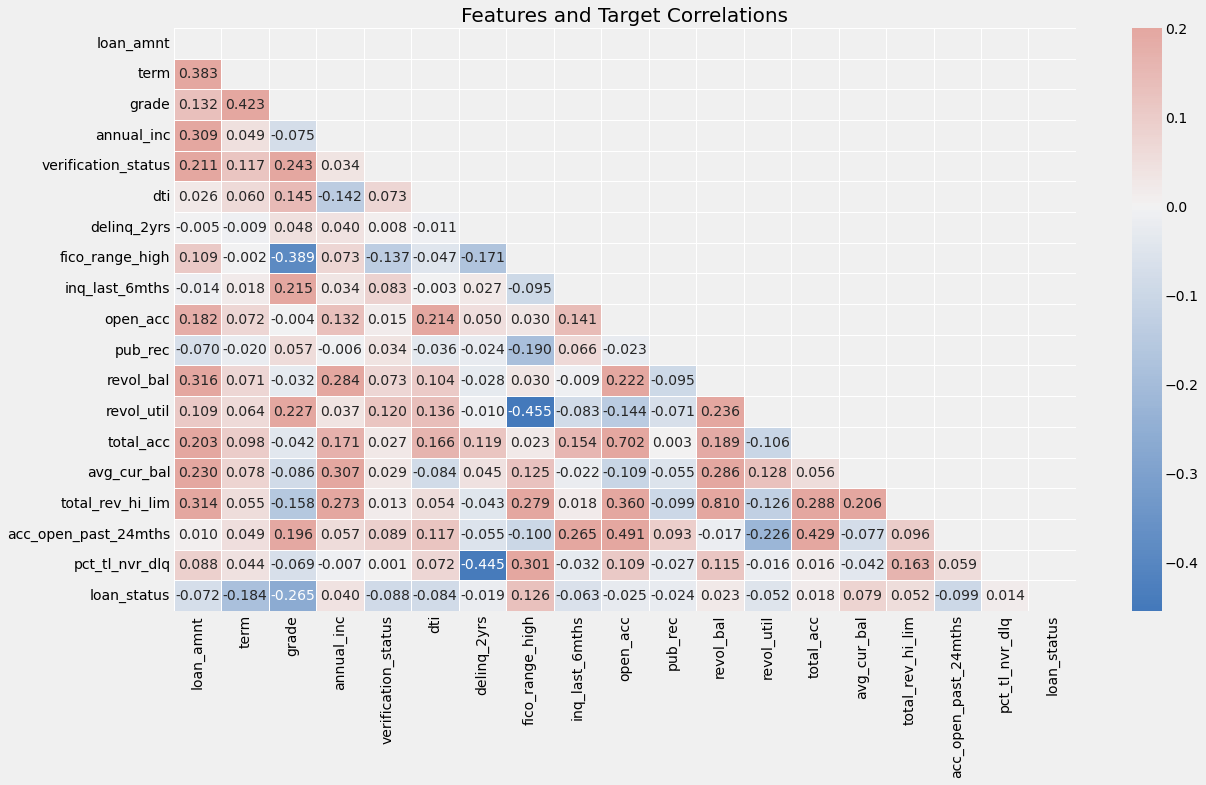

In [29]:
# Derive features correlation
import seaborn as sns
corrmat = df.corr()

# Visualize feature correlation
fig, ax = plt.subplots(figsize=(18,10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, annot=True, annot_kws={"size": 14}, 
            fmt="0.3f", mask=mask, cmap=cmap, vmax=.2, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": 1})

ax.set_title('Features and Target Correlations', fontsize=20, color='black');

In [30]:
# Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
# For each X, calculate VIF and save in dataframe
def vif(X):
    
    # perform feature scaling
    scaler = StandardScaler()
    xs = scaler.fit_transform(X)
    
    # subsume into a dataframe
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]
    
    return vif

In [32]:
# List scores
vif(X).round(2)

,Features,VIF Factor
0,loan_amnt,1.53
1,term,1.46
2,grade,1.77
3,annual_inc,1.29
4,verification_status,1.12
5,dti,1.16
6,delinq_2yrs,1.31
7,fico_range_high,1.99
8,inq_last_6mths,1.14
9,open_acc,2.54


In [33]:
labels = []
values = []
for i in range(len(df['grade'].value_counts())):
  labels.append(i)
  values.append(df['grade'].value_counts()[i])
tempdict = {'labels': labels, 'AllData': values}
temp_all_df = pd.DataFrame(tempdict)

In [34]:
labels = []
values = []
defaultdf = df[df['loan_status'] == 0]
for i in range(len(defaultdf['grade'].value_counts())):
  labels.append(i)
  values.append(defaultdf['grade'].value_counts()[i])
tempdict = {'labels': labels, 'Default': values}
temp_default_df = pd.DataFrame(tempdict)

In [35]:
labels = []
values = []
defaultdf = df[df['loan_status'] == 1]
for i in range(len(defaultdf['grade'].value_counts())):
  labels.append(i)
  values.append(defaultdf['grade'].value_counts()[i])
tempdict = {'labels': labels, 'NonDefault': values}
temp_nondefault_df = pd.DataFrame(tempdict)

In [36]:
whole_df = pd.merge(temp_all_df, temp_default_df, on='labels')
whole_df = pd.merge(whole_df, temp_nondefault_df, on='labels')
whole_df['default_rate'] = whole_df['Default']/whole_df['AllData']
whole_df

,labels,AllData,Default,NonDefault,default_rate
0,0,219980,14762,205218,0.067106
1,1,376762,55570,321192,0.147494
2,2,376369,92097,284272,0.244699
3,3,197524,64702,132822,0.327565
4,4,91633,37330,54303,0.407386
5,5,31088,14667,16421,0.471790
6,6,8920,4662,4258,0.522646


Text(0.5, 1.0, 'Distribution of Default Rate on Grade')

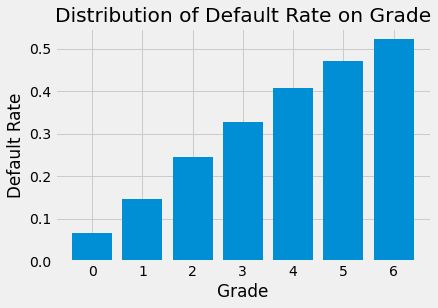

In [37]:
import matplotlib.pyplot as plt
plt.bar(whole_df['labels'], whole_df['default_rate'])
plt.xlabel("Grade")
plt.ylabel("Default Rate")
plt.title("Distribution of Default Rate on Grade")

Text(0, 0.5, 'Number')

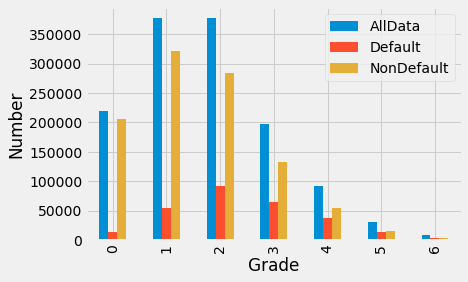

In [38]:
ax = whole_df.plot(x="labels", y=["AllData", "Default", "NonDefault"], kind="bar")
ax.set_xlabel("Grade")
ax.set_ylabel("Number")

In [47]:
import plotly.express as px

fig = px.pie(whole_df, values='Default', names='labels', title="Default by Grade")
fig.show()

In [45]:
fig = px.pie(whole_df, values='NonDefault', names='labels', title="Non-Default by Grade")
fig.show()

In [48]:
labels = []
values = []
for i in range(len(df['term'].value_counts())):
  labels.append(i)
  values.append(df['term'].value_counts()[i])
tempdict = {'labels': labels, 'AllData': values}
temp_all_df = pd.DataFrame(tempdict)

In [49]:
labels = []
values = []
defaultdf = df[df['loan_status'] == 0]
for i in range(len(defaultdf['term'].value_counts())):
  labels.append(i)
  values.append(defaultdf['term'].value_counts()[i])
tempdict = {'labels': labels, 'Default': values}
temp_default_df = pd.DataFrame(tempdict)

In [50]:
labels = []
values = []
defaultdf = df[df['loan_status'] == 1]
for i in range(len(defaultdf['term'].value_counts())):
  labels.append(i)
  values.append(defaultdf['term'].value_counts()[i])
tempdict = {'labels': labels, 'NonDefault': values}
temp_nondefault_df = pd.DataFrame(tempdict)

In [51]:
whole_df = pd.merge(temp_all_df, temp_default_df, on='labels')
whole_df = pd.merge(whole_df, temp_nondefault_df, on='labels')
whole_df['default_rate'] = whole_df['Default']/whole_df['AllData']
whole_df

,labels,AllData,Default,NonDefault,default_rate
0,0,983141,171690,811451,0.174634
1,1,319135,112100,207035,0.351262


Text(0, 0.5, 'Default Rate')

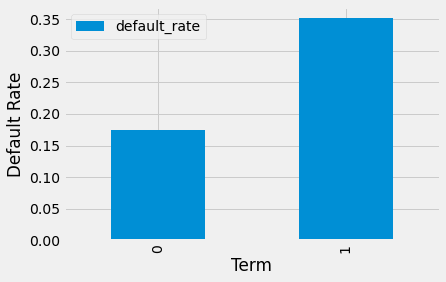

In [52]:
ax = whole_df.plot(x='labels', y='default_rate', kind="bar")
ax.set_xlabel("Term")
ax.set_ylabel("Default Rate")

Text(0, 0.5, 'Number')

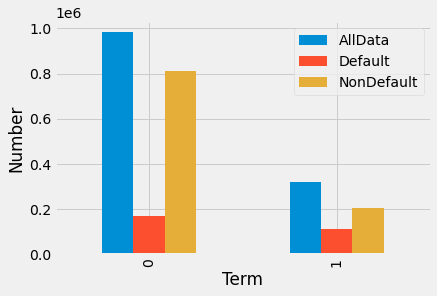

In [53]:
ax = whole_df.plot(x="labels", y=["AllData", "Default", "NonDefault"], kind="bar")
ax.set_xlabel("Term")
ax.set_ylabel("Number")

In [54]:
fig = px.pie(whole_df, values='Default', names='labels', title="Default by Term")
fig.show()

In [55]:
fig = px.pie(whole_df, values='NonDefault', names='labels', title="Non-Default by Term")
fig.show()

In [56]:
labels = []
values = []
for i in range(len(df['verification_status'].value_counts())):
  labels.append(i)
  values.append(df['verification_status'].value_counts()[i])
tempdict = {'labels': labels, 'AllData': values}
temp_all_df = pd.DataFrame(tempdict)

In [57]:
labels = []
values = []
defaultdf = df[df['loan_status'] == 0]
for i in range(len(defaultdf['verification_status'].value_counts())):
  labels.append(i)
  values.append(defaultdf['verification_status'].value_counts()[i])
tempdict = {'labels': labels, 'Default': values}
temp_default_df = pd.DataFrame(tempdict)

In [58]:
labels = []
values = []
defaultdf = df[df['loan_status'] == 1]
for i in range(len(defaultdf['verification_status'].value_counts())):
  labels.append(i)
  values.append(defaultdf['verification_status'].value_counts()[i])
tempdict = {'labels': labels, 'NonDefault': values}
temp_nondefault_df = pd.DataFrame(tempdict)

In [59]:
whole_df = pd.merge(temp_all_df, temp_default_df, on='labels')
whole_df = pd.merge(whole_df, temp_nondefault_df, on='labels')
whole_df['default_rate'] = whole_df['Default']/whole_df['AllData']
whole_df

,labels,AllData,Default,NonDefault,default_rate
0,0,384977,62802,322175,0.163132
1,1,514235,117355,396880,0.228213
2,2,403064,103633,299431,0.257113


Text(0, 0.5, 'Default Rate')

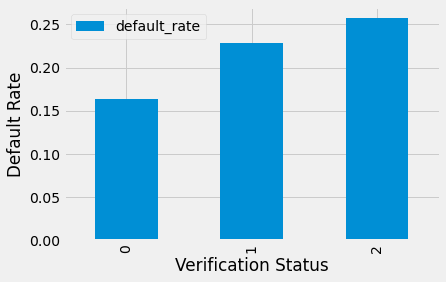

In [60]:
ax = whole_df.plot(x='labels', y='default_rate', kind="bar")
ax.set_xlabel("Verification Status")
ax.set_ylabel("Default Rate")

Text(0, 0.5, 'Number')

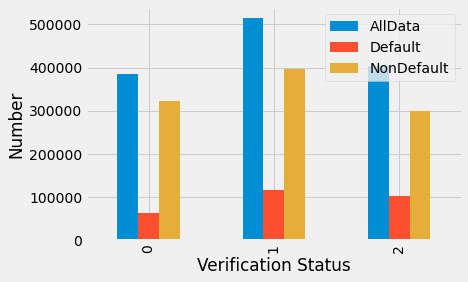

In [61]:
ax = whole_df.plot(x="labels", y=["AllData", "Default", "NonDefault"], kind="bar")
ax.set_xlabel("Verification Status")
ax.set_ylabel("Number")

In [62]:
fig = px.pie(whole_df, values='Default', names='labels', title="Default by Verification Status")
fig.show()

In [63]:
fig = px.pie(whole_df, values='NonDefault', names='labels', title="Non-Default by Verification Status")
fig.show()